In [2]:
%load_ext autoreload
%autoreload 2

from pandas import DataFrame
from pathlib import Path
import sys
from matplotlib.pyplot import figure, savefig, show
from seaborn import heatmap

project_dir = Path.cwd().parent  
sys.path.append(str(project_dir))
from utils.dslabs_functions import get_variable_types
from utils.data_loader import DataLoader


dataloader = DataLoader()
data, target = dataloader.get_security_classification_dataset_and_target()

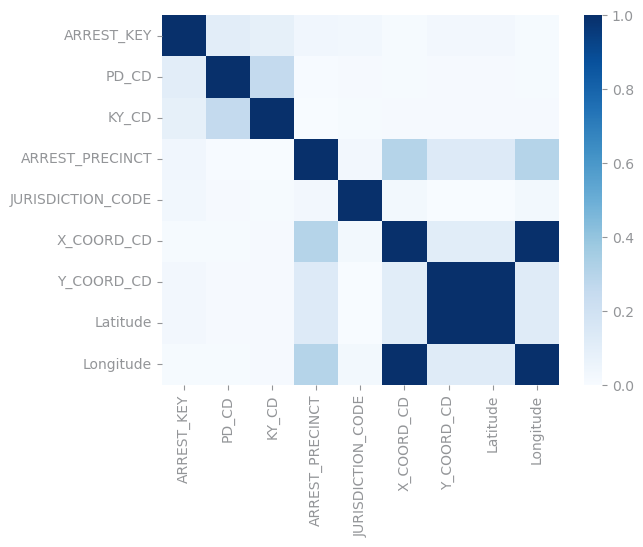

In [3]:


variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variables_types["numeric"]
corr_mtx: DataFrame = data[numeric].corr().abs()

figure()
heatmap(
    abs(corr_mtx),
    xticklabels=numeric,
    yticklabels=numeric,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)
file_tag = "security_classification"
path = f"images/{file_tag}_correlation_analysis.png"
if not Path(path).exists():
    savefig(path)
show()

# The economic Dataset

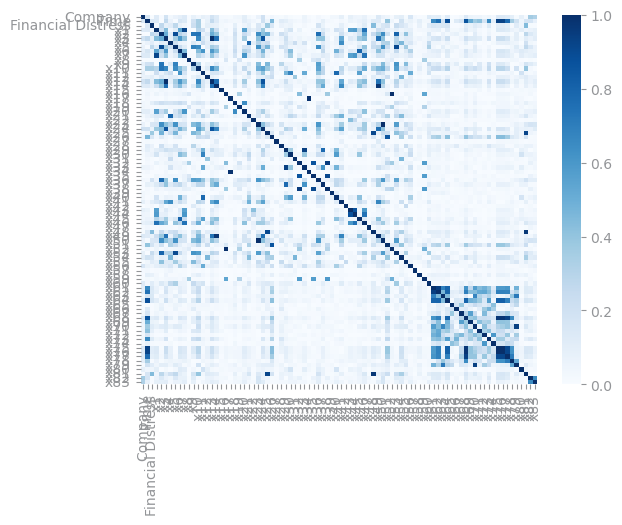

In [4]:
data, target = dataloader.get_econmical_classification_dataset_and_target()

variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variables_types["numeric"]
corr_mtx: DataFrame = data[numeric].corr().abs()

figure()
heatmap(
    abs(corr_mtx),
    xticklabels=numeric,
    yticklabels=numeric,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)
file_tag = "economic_classification"
path = f"images/{file_tag}_correlation_analysis.png"
if not Path(path).exists():
    savefig(path)
show()

In [5]:
threshold = 0.9  # or another chosen threshold
high_corr_pairs = []

for i in range(len(numeric)):
    for j in range(i + 1, len(numeric)):
        if corr_mtx.iloc[i, j] > threshold:
            high_corr_pairs.append((numeric[i], numeric[j]))

print("Highly correlated variable pairs:")
for pair in high_corr_pairs:
    print(pair)


Highly correlated variable pairs:
('Time', 'x75')
('Time', 'x76')
('x1', 'x7')
('x3', 'x13')
('x5', 'x53')
('x14', 'x49')
('x16', 'x52')
('x17', 'x34')
('x23', 'x50')
('x25', 'x48')
('x25', 'x81')
('x29', 'x33')
('x32', 'x38')
('x35', 'x38')
('x48', 'x81')
('x61', 'x62')
('x68', 'x75')
('x68', 'x76')
('x68', 'x77')
('x70', 'x79')
('x75', 'x76')
('x75', 'x77')
('x76', 'x77')


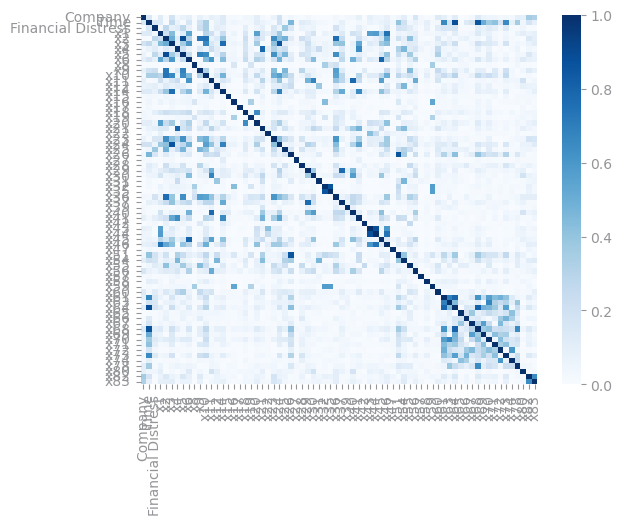

In [13]:
remove = [
    "x7", "x13", "x33", "x34", "x38", "x48", "x49", "x50", "x52", "x53", "x62", "x75", "x76", "x77", "x79", "x81"
]
data = data.drop(columns=remove)
variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variables_types["numeric"]
corr_mtx: DataFrame = data[numeric].corr().abs()

figure()
heatmap(
    abs(corr_mtx),
    xticklabels=numeric,
    yticklabels=numeric,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)
# file_tag = "economic_classification"
# path = f"images/{file_tag}_correlation_analysis.png"
# if not Path(path).exists():
#     savefig(path)
show()